# General Optics

In [2]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

#### Total Internal Reflection

If we now consider the outgoing angle $\theta_2$ as a function of the incident angle $\theta_1$, we obtain a characteristic plot, which looks for the materials glass ($n=1.5$) and air ($n=1$) like below. If the incident light is coming from air and following onto glass, we can change the incident angle up to $90$ degree, but only reach an outgoing angle of $41.8$ degree. If we reverse the materials, however, an outgoing angle is reached and an angle of incidence of $41.8$ degree. Light at larger incident angles is not anymore refracted out of the glass but reflected into the glass. Therefore, this phenomenon is called **total internal reflection**. It has some fantastic applications.

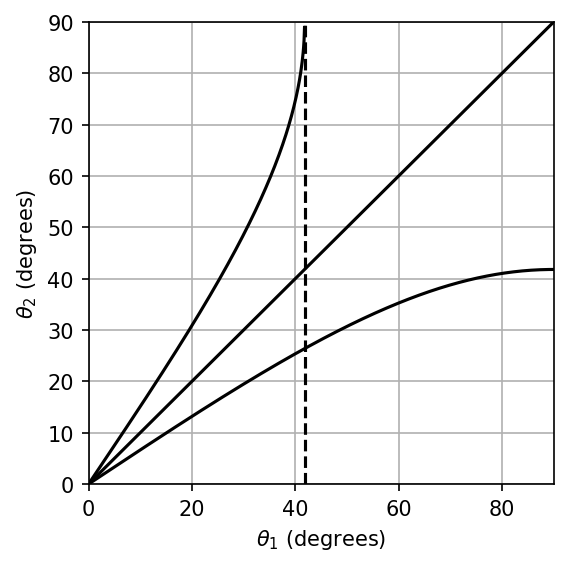

In [5]:
def snell_law(n1, n2, theta1_degrees):
    theta1_radians = np.radians(theta1_degrees)
    sin_theta2 = n1 / n2 * np.sin(theta1_radians)
    
    # Check for total internal reflection
    if sin_theta2 > 1:
        # Total internal reflection, no refraction
        return np.nan  # Use NaN to indicate no refraction occurs
    else:
        theta2_radians = np.arcsin(sin_theta2)
        return np.degrees(theta2_radians)

theta1 = np.linspace(0, 90, 1000)

n1_glass = 1.5
n2_air = 1.0

theta2_glass_to_air = np.array([snell_law(n1_glass, n2_air, angle) for angle in theta1])
plt.figure(figsize=(4, 4),dpi=150)
plt.plot(theta1, theta2_glass_to_air,"k", label='n1=1.5 to n2=1.0')
theta_c = np.degrees(np.arcsin(n2_air / n1_glass))
plt.axvline(x=theta_c, color='k', linestyle='--', label=f'Critical angle θc = {theta_c:.2f}°')

n1_glass = 1.0
n2_air = 1.5
theta2_glass_to_air = np.array([snell_law(n1_glass, n2_air, angle) for angle in theta1])

plt.plot(theta1, theta2_glass_to_air,"k", label='n1=1.5 to n2=1.0')
plt.plot(theta1, theta1,"k")

plt.xlabel(r'$θ_1$ (degrees)')
plt.ylabel(r'$θ_2$ (degrees)')

plt.xlim(0, 90)
plt.ylim(0, 90)
plt.grid(True)
plt.show()


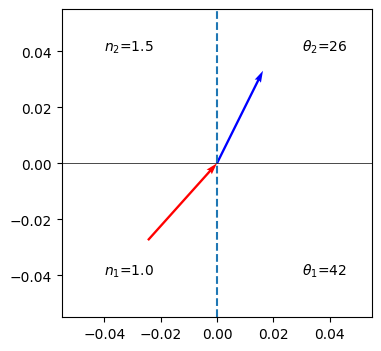

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
fig.canvas.header_visible = False
#@widgets.interact(n1=(1,2,0.01),n2=(1,3,0.01), angle=(0, 90, 0.1))
def update(n1=1,n2=1.5,angle=45):
    """Remove old lines from plot and plot new one"""
    ax.cla()
    theta1=angle*np.pi/180
    if n1*np.sin(theta1)/n2<=1:
        theta2=np.arcsin(n1*np.sin(theta1)/n2)
    else:
        theta2=-theta1+np.pi
    #ax.set_title("Refraction Explorer")    
    ax.axvline(x=0,ls='--')
    ax.text(-0.04,0.04,r'$n_2$={}'.format(n2))
    ax.text(-0.04,-0.04,r'$n_1$={}'.format(n1))
    ax.text(0.03,0.04,r'$\theta_2$={}'.format(round(theta2*180/np.pi),1))
    ax.text(0.03,-0.04,r'$\theta_1$={}'.format(round(theta1*180/np.pi),1))


    ax.axhline(y=0,color='k',lw=0.5)
    ax.quiver(0,0,np.sin(theta1),np.cos(theta1),scale=3,pivot='tip' ,color='red')
    ax.quiver(0,0,np.sin(theta2),np.cos(theta2),scale=3,color='blue')  
    
update(n1=1.,n2=1.5,angle=41.9)